In [1]:
import numpy as np
import matplotlib.pyplot as plt

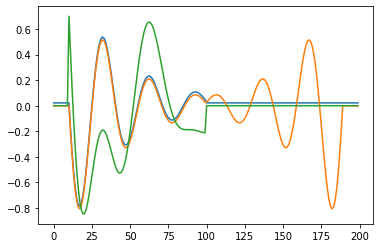

In [2]:
true_Z = {
    'Z': 0.95 + 0.2j,
    'Xi': 0+1j,
}
s = np.zeros(200, dtype=np.complex128)
s[10:100] += (true_Z['Z'] ** np.arange(90)) * true_Z['Xi']
s_centered = s.real
s_uncentered = s_centered - np.mean(s_centered)
s_mixed = s.copy()
s_mixed[100:190] += ((true_Z['Z'] ** np.arange(90)) * true_Z['Xi'])[::-1]
s_mixed = s_mixed.real
s_mixed_freq = s.copy()
true_Z_2 = {
    'Z': 0.98 + 0.1j,
    'Xi': 0.7+0.7j,
}
s_mixed_freq[10:100] += ((true_Z_2['Z'] ** np.arange(90)) * true_Z_2['Xi'])
s_mixed_freq = s_mixed_freq.real
plt.plot(s_uncentered)
plt.plot(s_mixed)
plt.plot(s_mixed_freq)

In [3]:
from pydmd import ZDecomposition, HankelDMD, DMD
from pydmd.zdecomposition import calculate_dynamics
import warnings

In [4]:
warnings.filterwarnings("ignore", category=UserWarning, module='pydmd', lineno=722)
warnings.filterwarnings("ignore", category=RuntimeWarning, module='pydmd', lineno=272)

C:\ProgramData\Anaconda3\lib\site-packages\pydmd\zdecomposition.py:326: RuntimeWarning: invalid value encountered in log
  freqs = np.log(hdmd.eigs).imag / (2*np.pi)
C:\ProgramData\Anaconda3\lib\site-packages\pydmd\zdecomposition.py:139: RuntimeWarning: invalid value encountered in multiply
  * x[1] * candidate_dynamics[start:end]


91


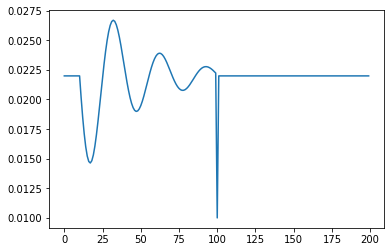

In [5]:
sub_dmd_args = {}
HDMD_kwargs = {
    'd': 9,
    'reconstruction_method': 'mean',
    'sub_dmd_class': DMD,
    'sub_class_args': sub_dmd_args
}

HDMD_obj = HankelDMD(**HDMD_kwargs)

z_dec = ZDecomposition(HDMD_obj=HDMD_obj)
Z, residual_signal = z_dec.sift(
    s_uncentered.real, 40, min_freq=0, max_freq=np.inf,
    perturbation_thresh=0.00001, corr_thresh=-0.0001, min_wavelength_match=0.5,
    wav_mag_thresh=0
)
print(Z['len'])
plt.plot(residual_signal)

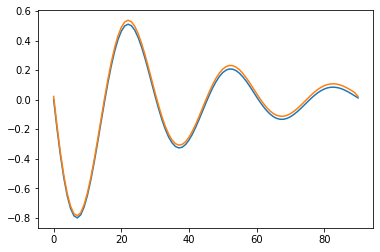

In [6]:
plt.plot(
    calculate_dynamics(
        Z['Z'],
        Z['Xi'],
        len(s),
        Z['t0']
    ).real[Z['start']:Z['end']]
)
plt.plot(s_uncentered[Z['start']:Z['end']])

In [7]:
print(true_Z)
print({'Z': Z['Z'], 'Xi': Z['Xi'] * (Z['Z'] ** -(Z['t0'] - 10))})
print(Z['start'], Z['end'])

{'Z': (0.95+0.2j), 'Xi': 1j}
{'Z': (0.9500000000000002+0.19999999999999926j), 'Xi': (5.4260149429108395e-09+0.9908807506017623j)}
10 101


90


C:\ProgramData\Anaconda3\lib\site-packages\pydmd\zdecomposition.py:326: RuntimeWarning: invalid value encountered in log
  freqs = np.log(hdmd.eigs).imag / (2*np.pi)


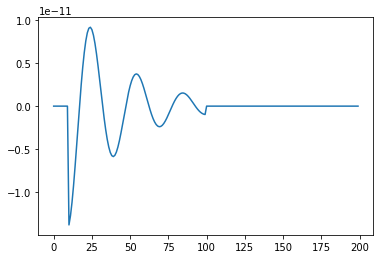

In [8]:
sub_dmd_args = {}
HDMD_kwargs = {
    'd': 9,
    'reconstruction_method': 'mean',
    'sub_dmd_class': DMD,
    'sub_class_args': sub_dmd_args
}

HDMD_obj = HankelDMD(**HDMD_kwargs)

z_dec = ZDecomposition(HDMD_obj=HDMD_obj)
Z, residual_signal = z_dec.sift(
    s_centered.copy(), 40, min_freq=0, max_freq=np.inf,
    perturbation_thresh=0.00001, corr_thresh=-0.0001, min_wavelength_match=0.5,
    wav_mag_thresh=0
)
print(Z['len'])
plt.plot(residual_signal)

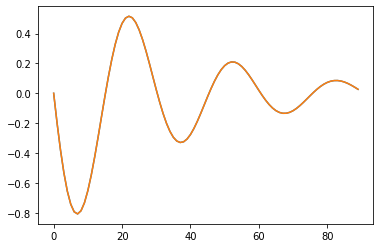

In [9]:
plt.plot(
    calculate_dynamics(
        Z['Z'],
        Z['Xi'],
        len(s),
        Z['t0']
    ).real[Z['start']:Z['end']]
)
plt.plot(s_centered[Z['start']:Z['end']])

In [10]:
print(true_Z)
print({'Z': Z['Z'], 'Xi': Z['Xi'] * (Z['Z'] ** -(Z['t0'] - 10))})
print(Z['start'], Z['end'])

{'Z': (0.95+0.2j), 'Xi': 1j}
{'Z': (0.9500000000000004+0.1999999999999999j), 'Xi': (1.3822387678885661e-11+1.0000000000019376j)}
10 100


Original


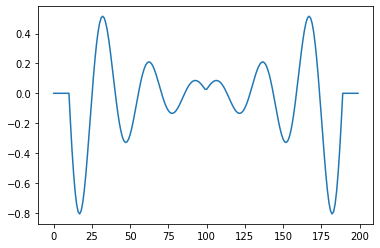

C:\ProgramData\Anaconda3\lib\site-packages\pydmd\zdecomposition.py:139: RuntimeWarning: invalid value encountered in multiply
  * x[1] * candidate_dynamics[start:end]


One sift


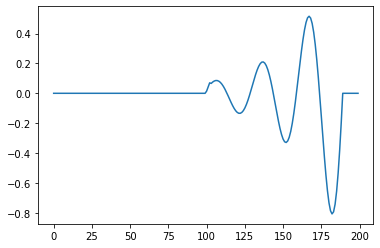

C:\ProgramData\Anaconda3\lib\site-packages\pydmd\zdecomposition.py:139: RuntimeWarning: invalid value encountered in multiply
  * x[1] * candidate_dynamics[start:end]


Two sifts


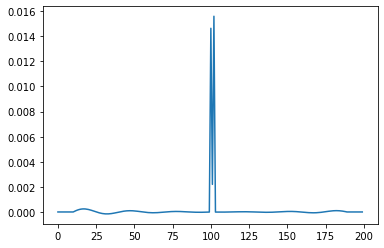

In [11]:
sub_dmd_args = {}
HDMD_kwargs = {
    'd': 9,
    'reconstruction_method': 'mean',
    'sub_dmd_class': DMD,
    'sub_class_args': sub_dmd_args
}

HDMD_obj = HankelDMD(**HDMD_kwargs)

print("Original")
plt.plot(s_mixed)
plt.show()

z_dec = ZDecomposition(HDMD_obj=HDMD_obj)
Z_1, residual_signal = z_dec.sift(
    s_mixed, 40, min_freq=0, max_freq=np.inf,
    perturbation_thresh=0.00001, corr_thresh=-0.0001, min_wavelength_match=0.5,
    wav_mag_thresh=np.std(s_mixed) * 0.5
)
print("One sift")
plt.plot(residual_signal)
plt.show()
Z_2, residual_signal = z_dec.sift(
    residual_signal, 40, min_freq=0, max_freq=np.inf,
    perturbation_thresh=0.0001, corr_thresh=-0.0001, min_wavelength_match=0.5,
    wav_mag_thresh=np.std(residual_signal) * 0.5
)
print("Two sifts")
plt.plot(residual_signal)
plt.show()

In [12]:
print(true_Z)
print({'Z': Z_1['Z'], 'Xi': Z_1['Xi'] * (Z_1['Z'] ** -(Z_1['t0'] - 10))})
print(Z_1['start'], Z_1['end'])

{'Z': (0.95+0.2j), 'Xi': 1j}
{'Z': (0.9499999999870506+0.19999999998177215j), 'Xi': (-2.526981346395729e-09+1.000301753238931j)}
10 103


In [13]:
print(Z_2['start'], Z_2['end'])
Z_2

101 190


{'Z': (1.0079575596434018+0.21220159146290454j),
 'A': (-0.3504416256347516-0.42561549724097525j),
 'M': array([0.18001443-0.23292642j, 0.23087426-0.19658059j,
        0.27442617-0.14915301j, 0.30826044-0.09210623j,
        0.33025853-0.02742582j, 0.33870638+0.04243733j,
        0.33239639+0.11464906j, 0.31071274+0.18609643j,
        0.2736953 +0.25351104j]),
 'Xi': (-0.32448520378858764+0.010021655969322276j),
 't0': 151,
 'start': 101,
 'end': 190,
 'len': 89,
 'window_error': 4.80863722945297e-06,
 'corr': array([           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan

Original


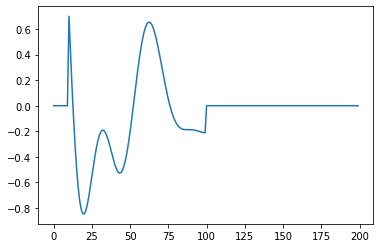

C:\ProgramData\Anaconda3\lib\site-packages\pydmd\zdecomposition.py:326: RuntimeWarning: invalid value encountered in log
  freqs = np.log(hdmd.eigs).imag / (2*np.pi)


One sift


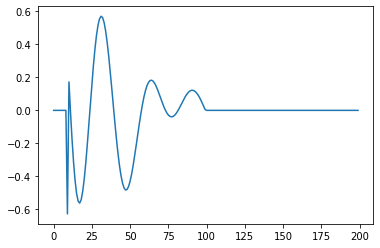

Two sifts


C:\ProgramData\Anaconda3\lib\site-packages\pydmd\zdecomposition.py:326: RuntimeWarning: invalid value encountered in log
  freqs = np.log(hdmd.eigs).imag / (2*np.pi)


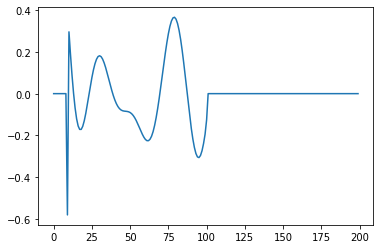

Three sifts


C:\ProgramData\Anaconda3\lib\site-packages\pydmd\zdecomposition.py:326: RuntimeWarning: invalid value encountered in log
  freqs = np.log(hdmd.eigs).imag / (2*np.pi)


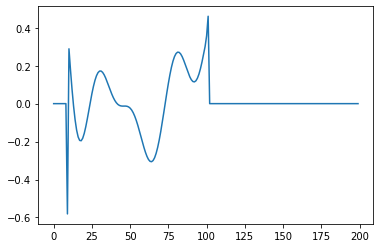

In [14]:
sub_dmd_args = {}
HDMD_kwargs = {
    'd': 9,
    'reconstruction_method': 'mean',
    'sub_dmd_class': DMD,
    'sub_class_args': sub_dmd_args
}

HDMD_obj = HankelDMD(**HDMD_kwargs)

print("Original")
plt.plot(s_mixed_freq)
plt.show()

z_dec = ZDecomposition(HDMD_obj=HDMD_obj)
Z_1, residual_signal = z_dec.sift(
    s_mixed_freq, 40, min_freq=0, max_freq=np.inf,
    perturbation_thresh=0.00001, corr_thresh=-0.1, min_wavelength_match=0.5,
    wav_mag_thresh=np.std(s_mixed) * 0.5
)
print("One sift")
plt.plot(residual_signal)
plt.show()
Z_2, residual_signal = z_dec.sift(
    residual_signal, 40, min_freq=0, max_freq=np.inf,
    perturbation_thresh=0.0001, corr_thresh=-0.1, min_wavelength_match=0.5,
    wav_mag_thresh=np.std(residual_signal) * 0.5
)
print("Two sifts")
plt.plot(residual_signal)
plt.show()
Z_3, residual_signal = z_dec.sift(
    residual_signal, 40, min_freq=0, max_freq=np.inf,
    perturbation_thresh=0.0001, corr_thresh=-0.1, min_wavelength_match=0.5,
    wav_mag_thresh=np.std(residual_signal) * 0.5
)
print("Three sifts")
plt.plot(residual_signal)
plt.show()

In [15]:
Z_1

{'Z': (0.9800000000000008+0.09999999999999899j),
 'A': (-0.8033082697722187-0.5291564552311018j),
 'M': array([0.32603195-0.1364838j , 0.33315969-0.10115093j,
        0.33661159-0.06581194j, 0.33646055-0.03083454j,
        0.3328148 +0.0034282j , 0.32581568+0.03664112j,
        0.31563526+0.06848987j, 0.30247356+0.09868359j,
        0.28655573+0.12695728j]),
 'Xi': (-0.6546293936909925-0.3159609520956482j),
 't0': 35,
 'start': 9,
 'end': 100,
 'len': 91,
 'window_error': 0.010864080286644737,
 'corr': array([            nan,             nan,             nan,             nan,
                    nan,             nan,             nan,             nan,
                    nan,  0.00000000e+00,  3.63231591e-02,  2.11336870e-02,
         7.28818700e-03, -4.53902512e-03, -1.38939449e-02, -2.05555631e-02,
        -2.45272744e-02, -2.60099093e-02, -2.53606652e-02, -2.30430730e-02,
        -1.95734424e-02, -1.54690123e-02, -1.12023507e-02, -7.16551724e-03,
                    nan,             